In [98]:
import numpy as np
import matplotlib.pyplot as plt

a_array = np.arange(5, 55, 5)
n_array = np.arange(10, 110, 10)

A = 25
V0 = 10
b = 2

def V(x):
    return 0 * x - V0 * np.logical_and(-b / 2 < x, x < b / 2)

def wave(x, s):
    N = n_array[-1]

    coeffs = np.loadtxt(f'data/n/v/{N}.dat')[:, s]

    y = x * 0j

    for i in range(-N, N + 1):
        k = 2 * np.pi * i / A
        y += coeffs[N + i] * np.exp(k * 1.0j * x) / np.sqrt(A)
    
    return y

E = np.loadtxt(f'data/n/e/{n_array[-1]}.dat')
Ea = np.array([np.loadtxt(f'data/a/e/{i}.dat') for i in a_array])
En = np.array([np.loadtxt(f'data/n/e/{i}.dat')[:10] for i in n_array])

In [99]:
print(f'The estimated ground state energy is {E[0]}.')

The estimated ground state energy is -0.6038550947685519.


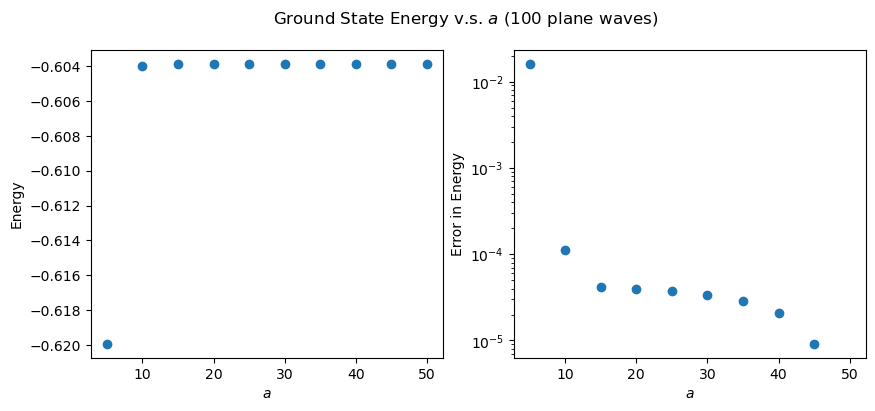

In [100]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.scatter(a_array, Ea[:, 0])
ax1.set_xlabel('$a$')
ax1.set_ylabel('Energy')

ax2.scatter(a_array, abs(Ea[:, 0] - Ea[-1, 0]))
ax2.set_yscale('log')
ax2.set_xlabel('$a$')
ax2.set_ylabel('Error in Energy')

fig.suptitle('Ground State Energy v.s. $a$ ($100$ plane waves)')
plt.show()

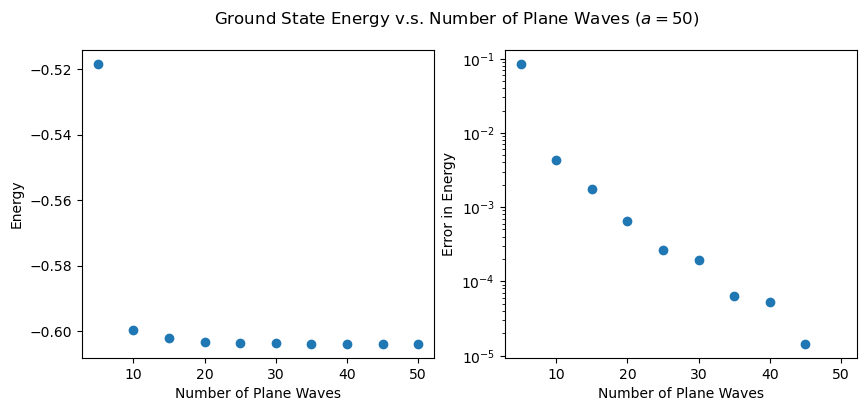

In [101]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.scatter(a_array, En[:, 0])
ax1.set_xlabel('Number of Plane Waves')
ax1.set_ylabel('Energy')

ax2.scatter(a_array, abs(En[:, 0] - En[-1, 0]))
ax2.set_yscale('log')
ax2.set_xlabel('Number of Plane Waves')
ax2.set_ylabel('Error in Energy')

fig.suptitle('Ground State Energy v.s. Number of Plane Waves ($a = 50$)')
plt.show()

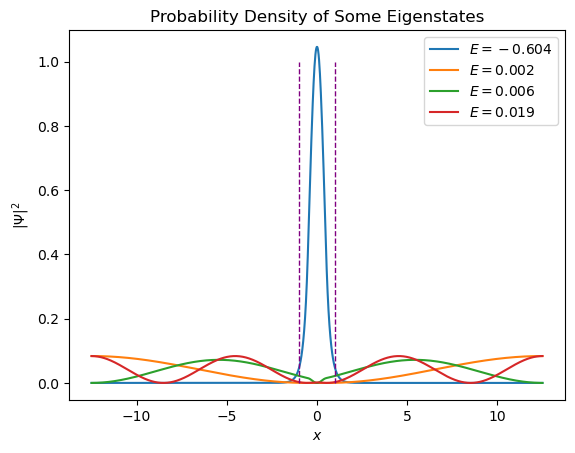

In [103]:
x = np.linspace(-A/2, A/2, 1000)

n_waves = 5

for i in range(0, n_waves - 1):
    y = wave(x, i)
    plt.plot(x, np.abs(y)**2)

plt.vlines(x=[-b/2, b/2], ymin=0, ymax=1, ls='--', lw=1, colors='purple')
plt.legend([f'$E = {round(i, 3)}$' for i in E[:n_waves - 1]])
plt.xlabel('$x$')
plt.ylabel('$|\Psi|^2$')
plt.title('Probability Density of Some Eigenstates')
plt.show()

In [95]:
# confirm normalization
print(sum(np.abs(wave(x, 0))**2) * (x[1] - x[0]))

1.0000000000000158
